<a href="https://colab.research.google.com/github/wujulie/emotion_predict/blob/main/basic_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filname = '/content/drive/MyDrive/mememoji-master/mememoji-master/src/fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('/content/drive/MyDrive/mememoji-master/mememoji-master/src/fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [2]:
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [3]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

7


In [4]:
# keras with tensorflow backend
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)#是NP.newaxis的別名。它創建一個長度為1的軸。這對於矩陣乘法等很有用。
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [6]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
from keras import backend as K

In [7]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()
    
    return model
model=my_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [8]:
path_model='model_filter.h5' # save model at this location after each epoch
K.clear_session() # destroys the current graph and builds a new one
model=my_model() # create the model
K.set_value(model.optimizer.lr,1e-3) # set the learning rate
# fit the model
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=20, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

Epoch 1/20
505/505 [==============================] - 47s 78ms/step - loss: 1.8032 - accuracy: 0.3064 - val_loss: 1.4674 - val_accuracy: 0.4330
Epoch 2/20
505/505 [==============================] - 38s 74ms/step - loss: 1.3183 - accuracy: 0.4964 - val_loss: 1.2406 - val_accuracy: 0.5222
Epoch 3/20
505/505 [==============================] - 38s 74ms/step - loss: 1.1155 - accuracy: 0.5789 - val_loss: 1.1012 - val_accuracy: 0.5795
Epoch 4/20
505/505 [==============================] - 37s 74ms/step - loss: 0.9766 - accuracy: 0.6369 - val_loss: 1.1776 - val_accuracy: 0.5623
Epoch 5/20
505/505 [==============================] - 37s 74ms/step - loss: 0.8259 - accuracy: 0.6990 - val_loss: 1.1157 - val_accuracy: 0.5887
Epoch 6/20
505/505 [==============================] - 37s 74ms/step - loss: 0.6929 - accuracy: 0.7510 - val_loss: 1.1046 - val_accuracy: 0.6239
Epoch 7/20
505/505 [==============================] - 37s 74ms/step - loss: 0.5309 - accuracy: 0.8142 - val_loss: 1.2052 - val_accuracy:

In [9]:
print(model.evaluate(X_test, y_test))
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

113/113 [==============================] - 2s 16ms/step - loss: 2.2671 - accuracy: 0.6166
[2.267136812210083, 0.6166062951087952]
[0 1 2 3 4 5 6]


In [10]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
plt.show()

In [11]:
y_pred=model.predict(X_test)
#print(y_pred)
y_test.shape

(3589, 7)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


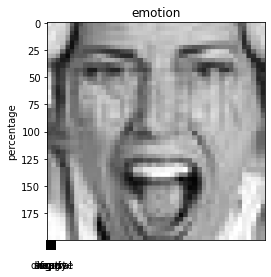

ind: 0
m: 0.9958449
ind: 0
m: 0.9958449
ind: 0
m: 0.9958449
ind: 0
m: 0.9958449
ind: 0
m: 0.9958449
ind: 0
m: 0.9958449
ind: 0
m: 0.9958449
Expression Prediction: angry


In [12]:
from skimage import io
img = image.load_img('/content/drive/MyDrive/mememoji-master/mememoji-master/src/01058.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('/content/drive/MyDrive/mememoji-master/mememoji-master/src/01058.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
    print("ind:",ind)
    print("m:",m)
        
print('Expression Prediction:',objects[ind])

In [15]:
custom

array([[9.9584490e-01, 3.9385966e-08, 4.1518370e-03, 1.7906972e-08,
        6.9812904e-07, 2.5011263e-06, 6.3926291e-09]], dtype=float32)